In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob

In [9]:
# Input your file path here
csv_path = "/home/wallacelab/investigating-complexity/output/CLIP-HBA/SavoiasOutput/CrossAttention/Scenes/Run4/test_predictions.csv"

# Path to images (modify if your images are stored elsewhere)
image_folder = "/home/wallacelab/investigating-complexity/Images/Savoias-Dataset/Images/Scenes"

# Load predictions
df = pd.read_csv(csv_path)

# Strip prefix to get numeric ID
df["image_id"] = df["image_name"].str.extract(r"img_(\d+)", expand=False)

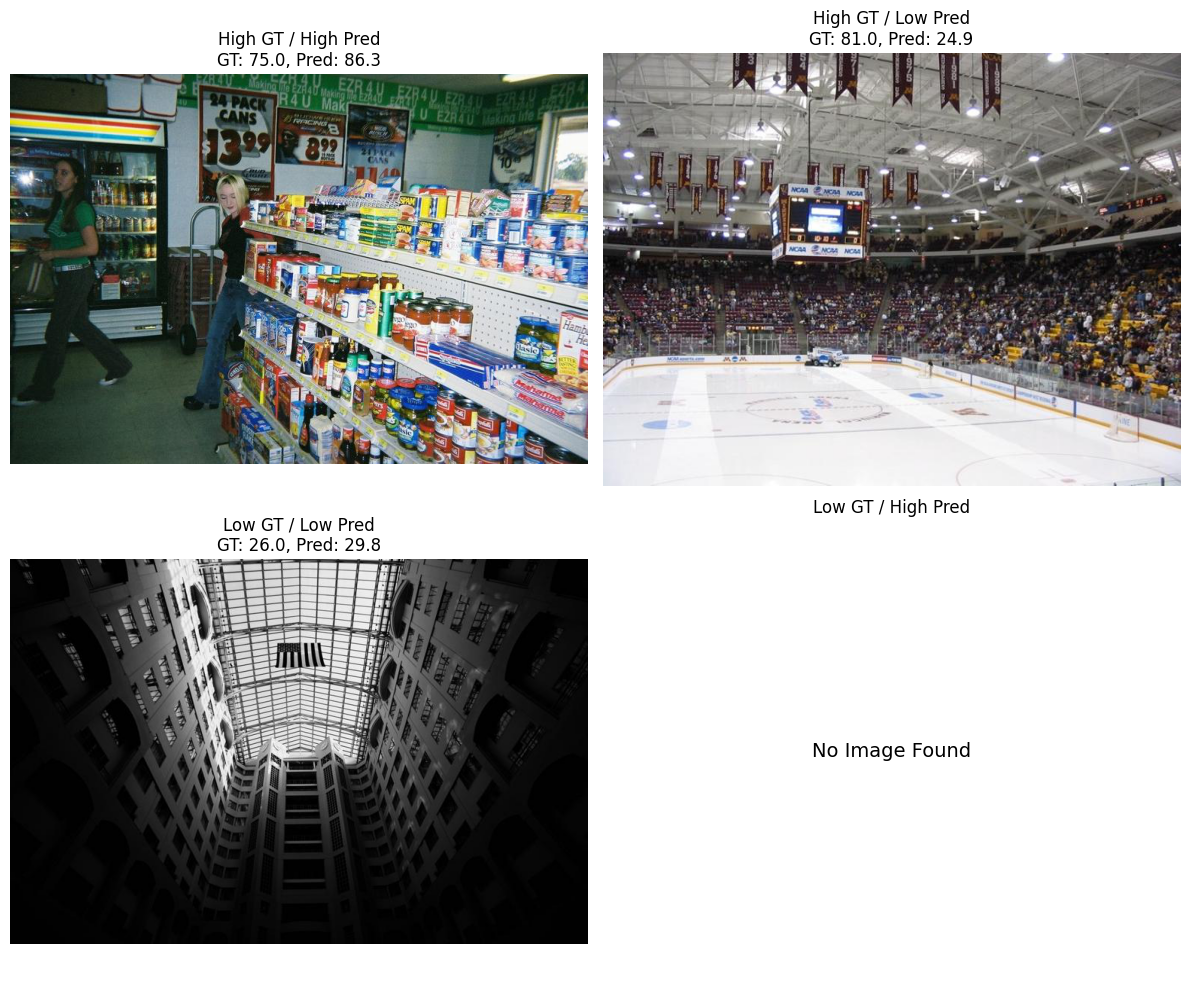

In [10]:
# Apply fixed thresholds
high_gt = df['ground_truth_complexity'] > 70
low_gt = df['ground_truth_complexity'] < 30
high_pred = df['predicted_complexity'] > 70
low_pred = df['predicted_complexity'] < 30

# Define category conditions
conditions = {
    "High GT / High Pred": high_gt & high_pred,
    "High GT / Low Pred": high_gt & low_pred,
    "Low GT / Low Pred": low_gt & low_pred,
    "Low GT / High Pred": low_gt & high_pred,
}

# Helper to find image file regardless of extension
def find_image_file(image_folder, image_id):
    matches = glob.glob(os.path.join(image_folder, f"{image_id}.*"))
    return matches[0] if matches else None

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (title, condition) in enumerate(conditions.items()):
    ax = axes[i]
    try:
        img_row = df[condition].iloc[0]
        image_id = img_row['image_name'].split('_')[-1].split('.')[0]  # Extract numeric ID
        img_path = find_image_file(image_folder, image_id)

        if img_path and os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{title}\nGT: {img_row['ground_truth_complexity']:.1f}, Pred: {img_row['predicted_complexity']:.1f}")
        else:
            raise FileNotFoundError

    except (IndexError, FileNotFoundError):
        ax.text(0.5, 0.5, "No Image Found", ha='center', va='center', fontsize=14)
        ax.axis('off')
        ax.set_title(title)

plt.tight_layout()
plt.show()